<a href="https://colab.research.google.com/github/mikias-wondim/news_correlation_10ac_week0/blob/task-1/notebooks/w0_d1_new_correlation_eda_and_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Global News Data

### Setting up our enviroments

In [ ]:
# install miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

In [ ]:
# update conda into current version
!conda update -n base -c defaults conda -y

In [ ]:
# Creating an environment named 'myenv' with specific python version(3.12)
!conda init
!conda create -n myenv python=3.1 -y
!conda activate myenv

### Clone the starter pack

In [ ]:
# Clone the startes python pack and cd into the folder
#!git clone https://github.com/10xac/week0_starter_network_analysis.git
!cd week0_starter_network_analysis

In [ ]:
# Installing the required libraries, although colab has already installed most of them
# !pip install -r week0_starter_news_correlation_analysis/requirements.txt

### Mounting current working colab with our drive

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Check if the code is running in Google Colab and return the appropriate base directory path
def get_base_directory():
    """
    Returns the base directory path based on the environment.

    If running in Google Colab, returns '/content/', otherwise returns an empty string.
    """
    try:
        import google.colab
        return '/content/week0_starter_news_correlation_analysis'
    except ImportError:
        return ''

# use our base directory
base_directory = get_base_directory()
# print("Base directory:", base_directory)

Base directory: /content/week0_starter_news_correlation_analysis


In [ ]:
# CONSTANT VARIABLES
BASE_DIR = get_base_directory()
DATASET_DIR = '/dataset/'

# Path to the destination directory of extracted zip files
EXTRACT_FILE_PATH = '/content/extracted_data/'

# Dataset filepath on drive
DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/data.csv.zip'
DOMAINS_LOCATIONZIP_FILE_PATH = '/content/drive/MyDrive/dataset/domains_location.csv'
RAW_DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/raw_data.zip'
TRAFFIC_DATA_ZIP_FILE_PATH = '/content/drive/MyDrive/dataset/traffic_data.zip'

### Lets get started with importing Libraries and extracting our dataset

In [ ]:
# Lets import the necessary libraries for our EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import our datasets using function defined in our src/util module
from week0_starter_news_correlation_analysis.src.utils import unzip_file

# Unzip the .csv files
data_extracted_files = unzip_file(DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]
# raw_data_extracted_files = unzip_file(RAW_DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]
traffic_data_extracted_files = unzip_file(TRAFFIC_DATA_ZIP_FILE_PATH, EXTRACT_FILE_PATH)[0]

Extraction complete.
Extraction complete.


In [ ]:
# Lets also move the domain_location.csv file from drive into the extracted_data directory using shutil util
# import shutil

# SOURCE_FILE_PATH = '/content/drive/MyDrive/dataset/domains_location.csv'
# DESTINATION_FILE_PATH = '/content/extracted_data/domains_location.csv'
# domains_location_file_path = 'domains_location.csv'
# shutil.move(SOURCE_FILE_PATH, DESTINATION_FILE_PATH)

### Change dataset into pandas DataFrame

In [ ]:
# Load the datasets into pandas dataframes
data_df = pd.read_csv(EXTRACT_FILE_PATH + data_extracted_files)
# raw_data_df = pd.read_csv(EXTRACT_FILE_PATH + raw_data_extracted_files)
domains_location_df = pd.read_csv(EXTRACT_FILE_PATH + domains_location_file_path)
traffic_data_df = pd.read_csv(EXTRACT_FILE_PATH + traffic_data_extracted_files)

let's start exploring the data by looking at the first few rows and checking the data types.

In [ ]:
# Display the first few rows of each dataframe
print("Data dataframe:")
print(data_df.head())
print("\nDomains Location dataframe:")
print(domains_location_df.head())
print("\nTraffic Data dataframe:")
print(traffic_data_df.head())

Data dataframe:
   article_id source_id     source_name  \
0       81664       NaN          Forbes   
1       81667       NaN             CNA   
2       81694      time            Time   
3       81695       NaN        Phys.Org   
4       81703       NaN  Digital Trends   

                                              author  \
0  Elizabeth Brownfield, Contributor, \n Elizabet...   
1                                                NaN   
2                              Christina Larson / AP   
3                                       Sara Schmidt   
4                                       Jason Struss   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                         descriptio

In [ ]:
# Check the data types of each column
print("\nData dataframe info:")
print(data_df.info())
print("\nDomains Location dataframe info:")
print(domains_location_df.info())
print("\nTraffic Data dataframe info:")
print(traffic_data_df.info())


Data dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB
None

Domains Location dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 3 column

### After loading the data and checking its structure, we can proceed with the exploratory data analysis (EDA) to answer the questions provided

### Answer the task questions:

##### Statistics description

Top and Bottom 10 Websites with the Largest Count of News Articles:

In [ ]:
# Top 10 websites with the largest count of news articles
top_10_websites = data_df['source_name'].value_counts().head(10)
print("Top 10 websites with the largest count of news articles:")
print(top_10_websites)

# Bottom 10 websites with the smallest count of news articles
bottom_10_websites = data_df['source_name'].value_counts().tail(10)[::-1]
print("\nBottom 10 websites with the smallest count of news articles:")
print(bottom_10_websites)

Top 10 websites with the largest count of news articles:
source_name
ETF Daily News        16746
The Times of India     7504
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
BBC News               2113
ABC News               2058
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Name: count, dtype: int64

Bottom 10 websites with the smallest count of news articles:
source_name
AllAfrica - Top Africa News     20
The Verge                      214
CNN                            267
Wired                          270
Euronews                       286
ReadWrite                      324
Gizmodo.com                    388
Android Central                522
Time                           600
CNA                            674
Name: count, dtype: int64


Top Websites with the highest and Bottom 10 lowest numbers of visitors traffic

In [ ]:
# Get the top 10 and bottom 10 websites based on their traffic ranks
top_10_traffic_websites = traffic_data_df.head(10)
bottom_10_traffic_websites = traffic_data_df.tail(10)[::-1]

# Display the top 10 and bottom 10 websites
print("Top 10 Websites with the highest numbers of visitors traffic:")
print(top_10_traffic_websites[['Domain', 'GlobalRank']])
print("\nBottom 10 Websites with the lowest numbers of visitors traffic:")
print(bottom_10_traffic_websites[['Domain', 'GlobalRank']])

Top 10 Websites with the highest numbers of visitors traffic:
                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10

Bottom 10 Websites with the lowest numbers of visitors traffic:
                        Domain  GlobalRank
999999  toyotamusicfactory.com     1000000
999998          soderhomes.com      999999
999997           pinkwater.com      999998
999996             mt-lock.com      999997
999995              kireie.com      999996
999994         keith-baker.com      999995
999993          irishcycle.com      999994
999992                hmag.com      999993
999991    exploring-africa.com      999992
999990            eiretrip.com      999991


Countries with Many Articles Written About Them:

In [ ]:
from collections import Counter
# List of country names
country_names = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

# Function to extract countries from the category of news articles
def extract_countries(category):
    # Check if the category is string
    if not isinstance(category, str):
        return 'not-country'

    # Initialize a Counter to count occurrences of each country
    country_counter = Counter()

    # Check if any part of the category matches any country name, ignoring case
    for country in country_names:
        if country.lower() in category.lower():
            # If found, increment the counter for that country
            country_counter[country] += 1

    return country_counter


# Apply the function to extract countries from the 'content' column
data_df['content_countries'] = data_df['category'].apply(extract_countries)

# Flatten the list of countries for each article
all_countries = [country for countries in data_df['content_countries'] for country in countries]

# Count the occurrences of each country
country_counts = Counter(all_countries)

# Get the countries with the highest number of articles written about them
top_countries = country_counts.most_common(10)

# Get the countries with the least number of articles written about them
least_countries = country_counts.most_common()[:-11:-1]


print("Countries that have many articles written about them:")
print(top_countries)

print("\nCountries that have the fewest articles written about them:")
print(least_countries)

Countries that have many articles written about them:
[('Canada', 2066), ('India', 1054), ('Australia', 877), ('United Kingdom', 753), ('Niger', 605), ('Ukraine', 577), ('Mexico', 553), ('United States', 481), ('Nigeria', 469), ('Germany', 459)]

Countries that have the fewest articles written about them:
[('Honduras', 3), ('Cabo Verde', 3), ('Burundi', 3), ('Andorra', 3), ('Gambia', 4), ('San Marino', 4), ('Eritrea', 6), ('Bhutan', 7), ('Vanuatu', 7), ('Liechtenstein', 8)]


Websites Reporting About Specific Regions:

In [ ]:
# Define dictionary of lists with key as the region name and value as the list of countries in that region
regions_countries_dict = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'US': ['United States'],
    'China': ['China'],
    'EU': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
}

# Function to extract the region mentioned in the content
def extract_region(content):
    # Iterate over the regions and check if the content mentions any country from that region
    for region, countries in regions_countries_dict.items():
        for country in countries:
            if country.lower() in content.lower():
                return region  # Return the region's name if a match is found

    return 'Other'  # Return 'Other' if no region is mentioned in the content

# Apply the function to extract region from the 'content' column
data_df['region'] = data_df['content'].apply(extract_region)

# Count the occurrences of each region
region_counts = data_df['region'].value_counts()

print("Regions mentioned in the news content:")
print(region_counts)

Regions mentioned in the news content:
region
Other          47427
Middle East     3381
Africa          2366
EU              1799
Russia          1074
US              1002
China            935
Ukraine          372
Name: count, dtype: int64


Countries with the highest number of news media organisations (represented by domains in the data)

In [ ]:
data_df['url'][100:149]

In [ ]:
# Function to extract domain names from URLs
def extract_domain(url):
    if "://" in url:
        url = url.split("://")[1]
    domain = url.split("/")[0]
    if domain.startswith("www."):
        domain = domain[4:]  # Remove "www." prefix
    return domain

# Apply the function to extract domain names from the 'url' column
data_df['domain'] = data_df['url'].apply(extract_domain)

# Merge data_df with domains_location_df to get country information
merged_df = pd.merge(data_df, domains_location_df, left_on='domain', right_on='SourceCommonName', how='left')

# Count the number of news media organizations (domains) for each country
country_counts = merged_df['Country'].value_counts()
country_counts

Country
United States     40849
United Kingdom     2113
Nigeria            1820
India              1176
Russia             1128
Name: count, dtype: int64

Websites with the Highest Count of Positive, Neutral, and Negative Sentiment:

In [ ]:
# Group the data by website domain and sentiment
sentiment_stats = data_df.groupby(['source_name','title_sentiment']).size().unstack(fill_value=0)

# Compute descriptive statistics for each sentiment category
sentiment_stats_mean = sentiment_stats.mean(axis=1)
sentiment_stats_median = sentiment_stats.median(axis=1)
sentiment_stats_variance = sentiment_stats.var(axis=1)

# Determine the websites with the highest counts of positive, neutral, and negative sentiment
top_positive_websites = sentiment_stats_mean.nlargest(10)
top_neutral_websites = sentiment_stats_median.nlargest(10)
top_negative_websites = sentiment_stats_variance.nlargest(10)

print("Top 10 Websites with the highest count of positive sentiment:")
print(top_positive_websites)
print("\nTop 10 Websites with the highest count of neutral sentiment:")
print(top_neutral_websites)
print("\nTop 10 Websites with the highest count of negative sentiment:")
print(top_negative_websites)

Top 10 Websites with the highest count of positive sentiment:
source_name
ETF Daily News        5582.000000
The Times of India    2501.333333
GlobeNewswire         1807.666667
Globalsecurity.org    1039.666667
Forbes                 928.000000
BBC News               704.333333
ABC News               686.000000
Business Insider       678.000000
The Punch              600.000000
Al Jazeera English     554.666667
dtype: float64

Top 10 Websites with the highest count of neutral sentiment:
source_name
The Times of India    1210.0
ETF Daily News         992.0
GlobeNewswire          905.0
Business Insider       890.0
BBC News               854.0
Globalsecurity.org     747.0
ABC News               726.0
Al Jazeera English     706.0
Forbes                 635.0
The Punch              455.0
dtype: float64

Top 10 Websites with the highest count of negative sentiment:
source_name
ETF Daily News        6.933956e+07
GlobeNewswire         5.592929e+06
The Times of India    5.258660e+06
Globalsecuri

##### Visualization Analysis

Check the Distribution of Sentiments for a Particular Domain:

In [ ]:
# Group the data by website domain
grouped_by_domain = data_df.groupby('domain')

# Calculate the count of positive, neutral, and negative sentiment for each domain
sentiment_counts = grouped_by_domain['title_sentiment'].value_counts().unstack().fillna(0)

# Calculate the mean sentiment counts for each website
mean_sentiment_counts = sentiment_counts.mean()

# Top 10 websites with the highest negative sentiments
top_10_highest_negative = sentiment_counts.drop(columns=['Neutral', 'Positive']).sort_values(by='Negative', ascending=False).head(10)

print('\nTop 10 Websites with the highest negative sentiments:')
print(top_10_highest_negative)

# Top 10 websites with the highest positive sentiments
top_10_highest_positive = sentiment_counts.drop(columns=['Negative', 'Neutral']).sort_values(by='Positive', ascending=False).head(10)

print('\nTop 10 Websites with the highest Positive sentiments:')
print(top_10_highest_positive)

# Top 10 websites with the highest neutral sentiments
top_10_highest_neutral = sentiment_counts.drop(columns=['Negative', 'Positive']).sort_values(by='Neutral', ascending=False).head(10)

print('\nTop 10 Websites with the highest neutral sentiments:')
print(top_10_highest_neutral)

print('\nMean of all websites: ')
print(sentiment_counts.mean())


Top 10 Websites with the highest negative sentiments:
title_sentiment               Negative
domain                                
businessinsider.com              890.0
bbc.co.uk                        828.0
globalsecurity.org               747.0
economictimes.indiatimes.com     744.0
abcnews.go.com                   726.0
aljazeera.com                    706.0
etfdailynews.com                 560.0
timesofindia.indiatimes.com      466.0
punchng.com                      455.0
rt.com                           403.0

Top 10 Websites with the highest Positive sentiments:
title_sentiment               Positive
domain                                
etfdailynews.com                 992.0
economictimes.indiatimes.com     932.0
globenewswire.com                905.0
forbes.com                       635.0
digitaltrends.com                406.0
androidcentral.com               272.0
businessinsider.com              237.0
timesofindia.indiatimes.com      213.0
boingboing.net                  

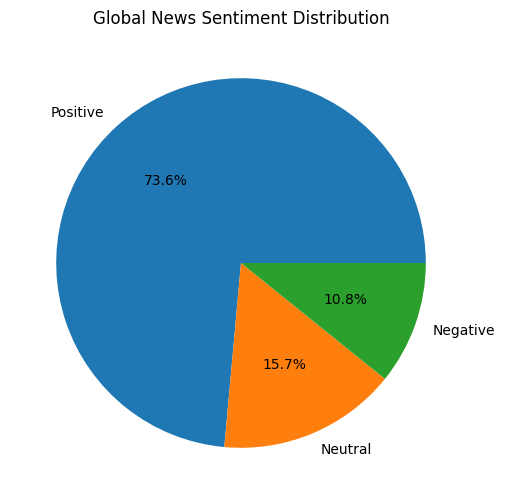

In [ ]:
# Calculate the global news sentiment distribution
global_sentiment_distribution = data_df['title_sentiment'].value_counts(normalize=True)

# Create a pie chart of the global sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(global_sentiment_distribution, labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%')
plt.title('Global News Sentiment Distribution')
plt.show()


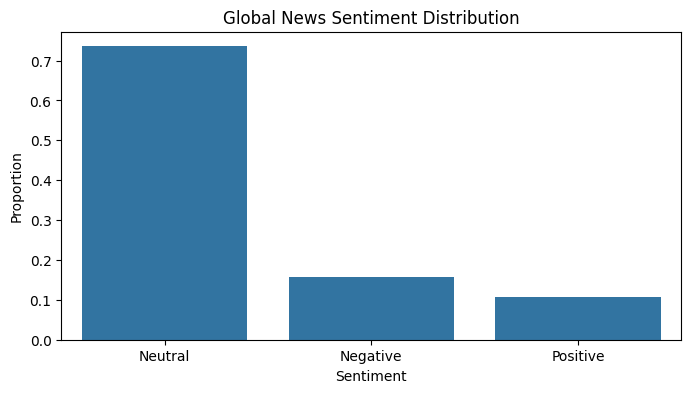

In [ ]:
# Create a bar chart of the global sentiment distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=global_sentiment_distribution.index, y=global_sentiment_distribution.values)
plt.title('Global News Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.show()

Sentiment distribution for the top 10 websites with most visitors traffic

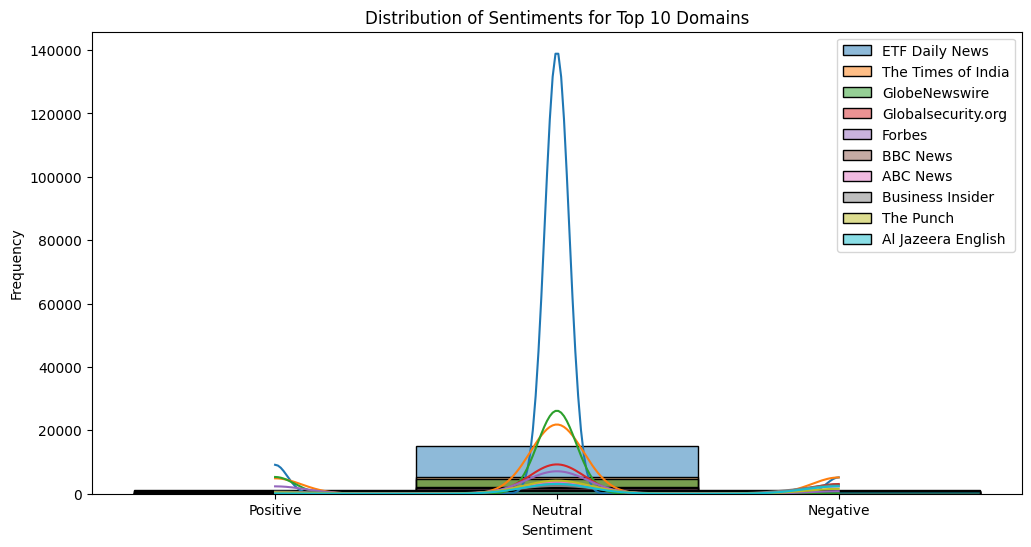

In [ ]:
# Select the top 10 domains by visitors traffic
top_10_domains = merged_df['source_name'].value_counts().head(10).index

# Plot the distribution of sentiments for the top 10 domains
plt.figure(figsize=(12, 6))
for domain in top_10_domains:
    sns.histplot(data=data_df[data_df['source_name'] == domain], x='title_sentiment', kde=True, label=domain)
plt.title('Distribution of Sentiments for Top 10 Domains')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Compare Content Metadata Across Sites:

In [ ]:
# Calculate the raw content lengths and the number of words in the title
data_df['message_length'] = data_df['content'].str.len()
data_df['title_word_count'] = data_df['title'].str.split().apply(len)

# Group the data by website domain
grouped_by_domain = data_df.groupby('domain')

# Calculate summary statistics for raw message lengths and title word counts for each domain
domain_stats = grouped_by_domain.agg({
    'message_length': ['mean', 'median', 'var'],
    'title_word_count': ['mean', 'median', 'var']
})

# Display the summary statistics DataFrame
print("Summary Statistics for Content Metadata Across Sites:")
print(domain_stats)


Summary Statistics for Content Metadata Across Sites:
                                 message_length                      \
                                           mean median          var   
domain                                                                
abcnews.go.com                       213.101069  214.0    45.436547   
aljazeera.com                        212.943510  213.0    16.847078   
allafrica.com                        213.350000  213.0     0.344737   
androidcentral.com                   213.961686  214.0     0.178951   
bbc.co.uk                            212.382874  213.0   102.764217   
bbc.com                              213.074074  213.0     0.694444   
boingboing.net                       213.502104  214.0     0.430122   
businessinsider.com                  213.211898  213.0     0.329401   
channelnewsasia.com                  213.378834  214.0     1.590519   
cnalifestyle.channelnewsasia.com     213.166667  213.0     0.617647   
cnaluxury.channelnewsas

Impact of Frequent News Reporting and Sentiment to the Website’s Global Ranking:

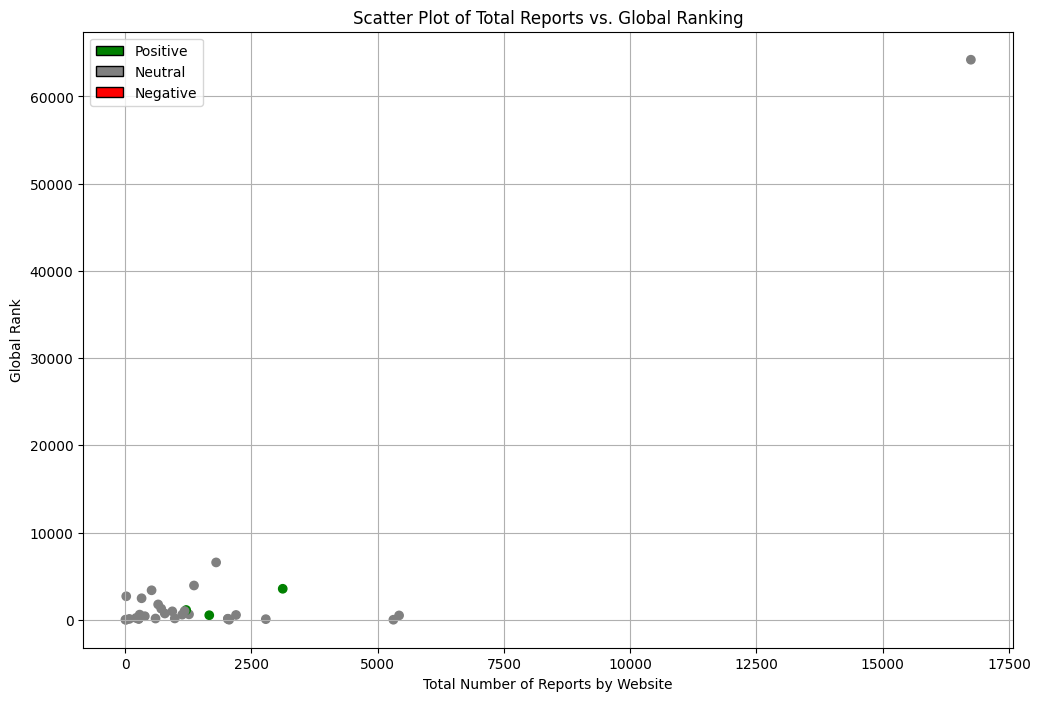

In [287]:

domain_sorted = data_df['domain'].value_counts()
# Extract the domain counts
domain_sorted_counts = domain_sorted.values
# Extract the domain values
domains = domain_sorted.index

global_ranks = []
for domain in domains:
    if domain in traffic_data_df['Domain'].values:
      global_rank = traffic_data_df.loc[traffic_data_df['Domain'] == domain, 'GlobalRank'].iloc[0]
      global_ranks.append(global_rank)
    else:
      global_ranks.append(0)

from matplotlib.patches import Patch

# Step 1: Group the data by the domain and count the occurrences of each sentiment category
sentiment_counts_by_domain = data_df.groupby('domain')['title_sentiment'].value_counts()

# Step 2: Find the most frequent sentiment for each domain
most_frequent_sentiment_by_domain = sentiment_counts_by_domain.groupby(level=0).idxmax().apply(lambda x: x[1]).reset_index(name='most_frequent_sentiment')

# Step 3: Map the most frequent sentiment values to corresponding colors
def map_sentiment_to_color(sentiment):
    if sentiment == 'Negative':
        return 'red'  # Negative sentiment
    elif sentiment == 'Neutral':
        return 'gray'  # Neutral sentiment
    elif sentiment == 'Positive':
        return 'green'  # Positive sentiment
    else:
        return 'black'  # Handle unknown values

# Apply the function to create a new column with color representations of sentiment
most_frequent_sentiment_by_domain['color'] = most_frequent_sentiment_by_domain['most_frequent_sentiment'].apply(map_sentiment_to_color)

# Create a legend for the color mapping
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Positive'),
    Patch(facecolor='gray', edgecolor='black', label='Neutral'),
    Patch(facecolor='red', edgecolor='black', label='Negative')
]

# Step 4: Plot the scatter plot with colors representing the most frequent sentiment categories and add the legend
plt.figure(figsize=(12, 8))
plt.scatter(domain_sorted_counts, global_ranks, color=most_frequent_sentiment_by_domain['color'])
plt.xlabel('Total Number of Reports by Website')
plt.ylabel('Global Rank')
plt.title('Scatter Plot of Total Reports vs. Global Ranking')
plt.grid(True)
plt.legend(handles=legend_elements)
plt.show()
